In [255]:
import torch
import matplotlib.pyplot as plt
from torch import nn

device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Your device:", device)

Your device: cpu


In [256]:
weight = 0.3
bias = 0.9
step = 1
X = torch.arange(0, 100, step)
y = weight * X + bias
splitter = 0.8 
X_train, y_train = X[:int(splitter * len(X))], y[:int(splitter*len(y))]
X_test, y_test = X[int(splitter * len(X)):], y[int(splitter*len(y)):]
X_test, y_test

(tensor([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
         98, 99]),
 tensor([24.9000, 25.2000, 25.5000, 25.8000, 26.1000, 26.4000, 26.7000, 27.0000,
         27.3000, 27.6000, 27.9000, 28.2000, 28.5000, 28.8000, 29.1000, 29.4000,
         29.7000, 30.0000, 30.3000, 30.6000]))

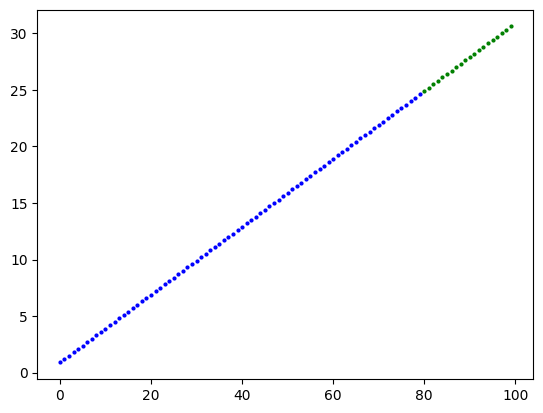

In [257]:
plt.scatter(X_train, y_train, c="b", s = 4,label = "Train")
plt.scatter(X_test, y_test, c="g", s = 4,label = "Test")

In [258]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                                requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                            requires_grad=True)
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

In [259]:
model = LinearRegressionModel()

In [260]:
model.state_dict()

OrderedDict([('weights', tensor([-0.6161])), ('bias', tensor([0.3632]))])

In [261]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),
                            0.01) # learning rate     

In [262]:
epochs = 300 
for epoch in range(epochs):
    #put model in training mode
    model.train()
    #get predictions on train data with forward() function
    y_pred = model(X_train)
    #calculate MAE
    loss = loss_fn(y_pred, y_train)
    #Zero the gradients of the optimizer
    optimizer.zero_grad()
    #Perform backpropagation on the loss
    loss.backward()
    #Progress / step for the optimizer
    optimizer.step()
model.state_dict()

OrderedDict([('weights', tensor([0.2111])), ('bias', tensor([0.4577]))])

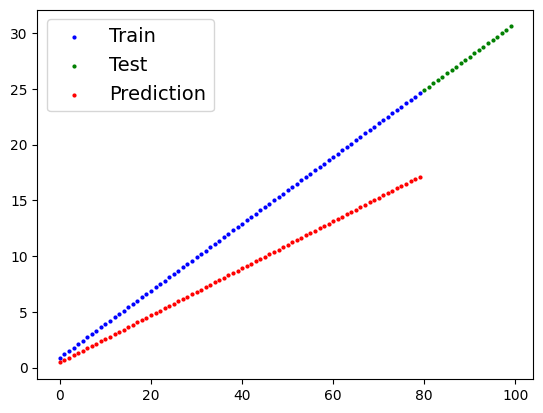

In [263]:
with torch.inference_mode():
    y_pred = model(X_train)
plt.scatter(X_train, y_train, c="b", s = 4,label = "Train")
plt.scatter(X_test, y_test, c="g", s = 4,label = "Test")
plt.scatter(X_train, y_pred,c="r", s= 4, label = "Prediction")
plt.legend(prop={"size":14})

In [264]:
model.state_dict()

OrderedDict([('weights', tensor([0.2111])), ('bias', tensor([0.4577]))])

In [265]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth
